### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando o Dataset

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,abreviacao,pais,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
0,CHN,China,"1,425,873,641",1,36.0,0.52,0.30,1.21,"1,010,740,000",2425.471293,43.10,54.30%,116,East Asia & Pacific,Upper middle income
1,IND,India,"1,418,914,739",2,58.0,0.68,0.05,2.73,"833,710,000",786.700098,29.54,34.45%,145,South Asia,Lower middle income
2,USA,United States,"338,573,477",3,45.0,3.33,1.00,30.00,"312,320,000",37491.179520,81.70,75.23%,68,North America,High income
3,IDN,Indonesia,"275,818,905",4,53.0,0.42,0.17,2.94,"196,000,000",1143.831514,51.46,32.29%,150,East Asia & Pacific,Lower middle income
4,PAK,Pakistan,"236,650,690",5,60.0,0.59,0.06,8.59,"118,800,000",668.547943,36.16,30.68%,184,South Asia,Lower middle income


### Tratando os dados

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   abreviacao           163 non-null    object 
 1   pais                 163 non-null    object 
 2   populacao            163 non-null    object 
 3   rank_populacao       163 non-null    int64  
 4   qtd_planos_internet  160 non-null    float64
 5   1GB_preco_medio      163 non-null    object 
 6   1GB_mais_barato      160 non-null    float64
 7   1GB_mais_caro        160 non-null    float64
 8   usuarios_internet    163 non-null    object 
 9   PIB_per_capita       153 non-null    float64
 10  populacao_urbana_%   160 non-null    float64
 11  usuarios_internet_%  163 non-null    object 
 12  rank_usuarios        163 non-null    object 
 13  regiao               163 non-null    object 
 14  grupo_renda          163 non-null    object 
dtypes: float64(5), int64(1), object(9)
memor

In [5]:
for i in range(len(data['usuarios_internet_%'])):
    data['usuarios_internet_%'][i] = data['usuarios_internet_%'][i].replace('%', '')
    data['usuarios_internet_%'][i] = data['usuarios_internet_%'][i].replace('(2016)', '')
for i in range(len(data['populacao'])):
    data['populacao'][i] = data['populacao'][i].replace(',', '')
for i in range(len(data['usuarios_internet'])):
    data['usuarios_internet'][i] = data['usuarios_internet'][i].replace(',', '')

C:\Users\manoe\AppData\Local\Temp/ipykernel_33676/3774713761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usuarios_internet_%'][i] = data['usuarios_internet_%'][i].replace('%', '')
C:\Users\manoe\AppData\Local\Temp/ipykernel_33676/3774713761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usuarios_internet_%'][i] = data['usuarios_internet_%'][i].replace('(2016)', '')
C:\Users\manoe\AppData\Local\Temp/ipykernel_33676/3774713761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [6]:
data['rank_populacao'] = data['rank_populacao'].astype(np.int64)

In [7]:
data['1GB_preco_medio'] = pd.to_numeric(data['1GB_preco_medio'], errors = 'coerce')

In [8]:
data['usuarios_internet_%'] = data['usuarios_internet_%'].astype(float)

In [9]:
data['populacao'] = data['populacao'].astype(np.int64)

In [10]:
data['usuarios_internet'] = data['usuarios_internet'].astype(np.int64)

In [11]:
data['rank_usuarios'] = pd.to_numeric(data['rank_usuarios'], errors = 'coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   abreviacao           163 non-null    object 
 1   pais                 163 non-null    object 
 2   populacao            163 non-null    int64  
 3   rank_populacao       163 non-null    int64  
 4   qtd_planos_internet  160 non-null    float64
 5   1GB_preco_medio      160 non-null    float64
 6   1GB_mais_barato      160 non-null    float64
 7   1GB_mais_caro        160 non-null    float64
 8   usuarios_internet    163 non-null    int64  
 9   PIB_per_capita       153 non-null    float64
 10  populacao_urbana_%   160 non-null    float64
 11  usuarios_internet_%  163 non-null    float64
 12  rank_usuarios        162 non-null    float64
 13  regiao               163 non-null    object 
 14  grupo_renda          163 non-null    object 
dtypes: float64(8), int64(3), object(4)
memor

### Dataset Tratado

In [13]:
data.head()

,abreviacao,pais,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
0,CHN,China,1425873641,1,36.0,0.52,0.30,1.21,1010740000,2425.471293,43.10,54.30,116.0,East Asia & Pacific,Upper middle income
1,IND,India,1418914739,2,58.0,0.68,0.05,2.73,833710000,786.700098,29.54,34.45,145.0,South Asia,Lower middle income
2,USA,United States,338573477,3,45.0,3.33,1.00,30.00,312320000,37491.179520,81.70,75.23,68.0,North America,High income
3,IDN,Indonesia,275818905,4,53.0,0.42,0.17,2.94,196000000,1143.831514,51.46,32.29,150.0,East Asia & Pacific,Lower middle income
4,PAK,Pakistan,236650690,5,60.0,0.59,0.06,8.59,118800000,668.547943,36.16,30.68,184.0,South Asia,Lower middle income


In [14]:
data.to_csv('dataset_tratado.csv', index = False)

### Estatísticas

In [15]:
data.describe()

,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios
count,1.630000e+02,163.000000,160.000000,160.000000,160.000000,160.000000,1.630000e+02,153.000000,160.00000,163.000000,162.000000
mean,4.371210e+07,101.957055,30.118750,3.305625,1.318312,28.147687,2.735189e+07,9135.521133,57.07525,54.536871,106.493827
std,1.621421e+08,61.715231,16.933229,5.335622,4.005838,66.667098,1.075535e+08,15228.152339,24.03169,28.369371,60.514384
min,1.137800e+04,1.000000,1.000000,0.050000,0.000000,0.630000,5.520000e+03,115.305996,10.40000,1.310000,1.000000
25%,1.983380e+06,48.500000,18.000000,0.897500,0.170000,5.222500,6.841115e+05,744.239413,37.21500,28.750000,54.250000
50%,9.062490e+06,98.000000,26.500000,1.785000,0.460000,11.555000,3.717818e+06,2549.558474,59.52000,57.270000,108.000000
75%,3.187097e+07,149.500000,42.000000,3.407500,1.212500,27.987500,1.213132e+07,9425.325870,75.10500,79.535000,159.750000
max,1.425874e+09,227.000000,60.000000,49.670000,45.160000,768.870000,1.010740e+09,105147.437700,100.00000,98.870000,209.000000


### Selecionando os países para analisar

- 20 primeiros países (maior população)

In [16]:
paises_analisar = data.loc[:20]

### Regiões para analisar

In [17]:
data[['regiao', 'pais']].groupby('regiao').count().sort_values(by = 'pais', ascending = False).reset_index()

,regiao,pais
0,Europe & Central Asia,46
1,Sub-Saharan Africa,37
2,East Asia & Pacific,26
3,Latin America & Caribbean,26
4,Middle East & North Africa,17
5,South Asia,8
6,North America,3


### Gráficos

##### Usuários de Internet (%) por País 
- barra

Text(-25, 23, 'Total de Países: 21')

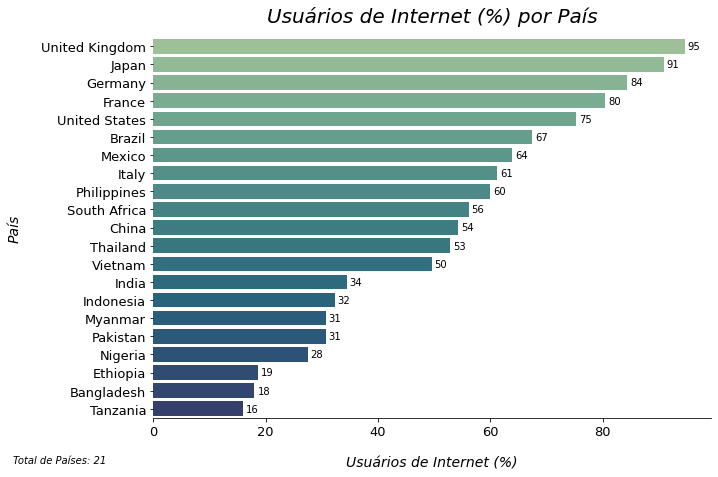

In [18]:
#criando uma figura
fig, ax = plt.subplots(figsize = (10,7))
#criando o gráfico
sns.barplot(x = 'usuarios_internet_%', y = 'pais', data = paises_analisar.sort_values(by = 'usuarios_internet_%', ascending = False), palette = 'crest')
#colocando um título
ax.set_title('Usuários de Internet (%) por País', fontsize = "20", style = "italic", loc = "center", pad = 15)
#mudando o nome do eixo x e y
ax.set_xlabel('Usuários de Internet (%)', fontsize = "14", style = 'italic', labelpad = 18)
ax.set_ylabel('País', fontsize = "14", style = "italic", labelpad = 20)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

for container in ax.containers:
    ax.bar_label(container,size=10,fmt='%.0f', label_type = 'edge', padding = 3)

#tirando o contorno do gráfico
sns.despine(left=True)

plt.text(-25, 23,'Total de Países: 21', fontsize=10, style = 'italic')

##### Usuários de Internet (%) por Região
- barra

In [19]:
usuarios_internet_regiao = data[['usuarios_internet_%', 'regiao']].groupby('regiao').mean().sort_values(by='usuarios_internet_%', ascending = False).reset_index()
usuarios_internet_regiao

,regiao,usuarios_internet_%
0,North America,88.766667
1,Europe & Central Asia,77.187174
2,Middle East & North Africa,71.970588
3,Latin America & Caribbean,54.900000
4,East Asia & Pacific,51.492308
5,South Asia,32.676250
6,Sub-Saharan Africa,22.202432


Text(-59, 7.98, 'Total de Países: 163')

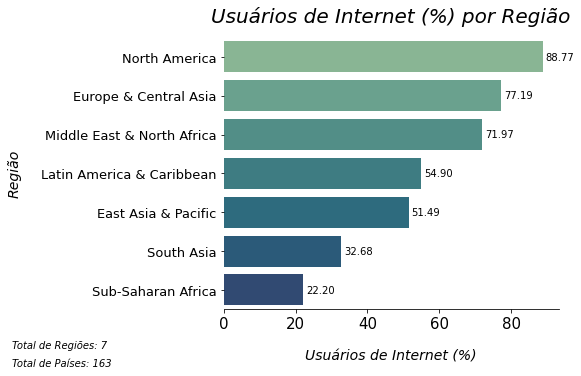

In [20]:
#criando uma figura
fig, ax = plt.subplots(figsize = (6,5))
#criando o gráfico
sns.barplot(x = 'usuarios_internet_%', y = 'regiao', data = usuarios_internet_regiao, palette = 'crest')
#colocando um título
ax.set_title('Usuários de Internet (%) por Região', fontsize = "20", style = "italic", loc = "center", pad = 15)
#mudando o nome do eixo x e y
ax.set_xlabel('Usuários de Internet (%)', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('Região', fontsize = "14", style = "italic", labelpad = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)

for container in ax.containers:
    ax.bar_label(container,size=10,fmt='%.2f', label_type = 'edge', padding = 3)

#tirando o contorno do gráfico
sns.despine(left=True)

plt.text(-59, 7.5,'Total de Regiões: 7', fontsize=10, style = 'italic')
plt.text(-59, 7.98,'Total de Países: 163', fontsize=10, style = 'italic')

##### Usuários de Internet (%) por Preço da Internet (todos os países)
- dispersão

In [21]:
for i in range(len(data)):
    if (data.loc[i, '1GB_preco_medio'] > 40):
        print (data.loc[i, 'pais'])
    else:
        None

Equatorial Guinea


In [22]:
data.loc[data.pais == 'Equatorial Guinea']

,abreviacao,pais,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
123,GNQ,Equatorial Guinea,1681985,152,4.0,49.67,45.16,63.22,332642,8654.536845,39.38,26.24,165.0,Sub-Saharan Africa,Upper middle income


Text(-18, -14, 'Total de Países: 163')

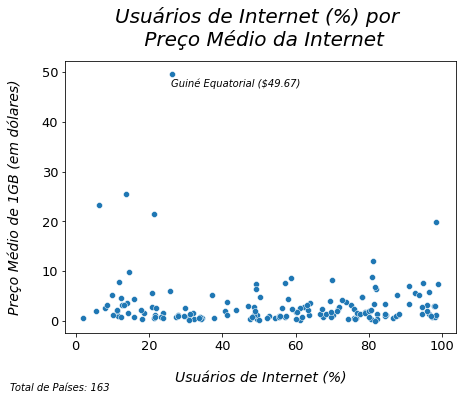

In [23]:
#criando uma figura
fig, ax = plt.subplots(figsize = (7,5))
#criando o gráfico
sns.scatterplot(x = 'usuarios_internet_%', y = '1GB_preco_medio', data = data)
#colocando um título
ax.set_title('Usuários de Internet (%) por \n Preço Médio da Internet', fontsize = "20", style = "italic", loc = "center", pad = 15)
#mudando o nome do eixo x e y
ax.set_xlabel('Usuários de Internet (%)', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('Preço Médio de 1GB (em dólares)', fontsize = "14", style = "italic", labelpad = 20)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#tirando o contorno do gráfico
sns.despine(left = False, top = False, right = False)

plt.text(26, 47,'Guiné Equatorial ($49.67)', fontsize=10, style = 'italic')

plt.text(-18, -14,'Total de Países: 163', fontsize=10, style = 'italic')

##### Usuários de Internet (%) por PIB per Capita (países escolhidos) 
- dispersão

Text(-5, -9990, 'Total de Países: 21')

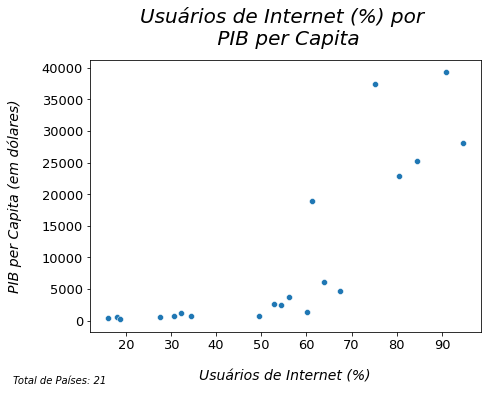

In [24]:
#criando uma figura
fig, ax = plt.subplots(figsize = (7,5))
#criando o gráfico
sns.scatterplot(x = 'usuarios_internet_%', y = 'PIB_per_capita', data = paises_analisar)
#colocando um título
ax.set_title('Usuários de Internet (%) por \n PIB per Capita', fontsize = "20", style = "italic", loc = "center", pad = 15)
#mudando o nome do eixo x e y
ax.set_xlabel('Usuários de Internet (%)', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('PIB per Capita (em dólares)', fontsize = "14", style = "italic", labelpad = 20)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#tirando o contorno do gráfico
sns.despine(left = False, top = False, right = False)

plt.text(-5, -9990,'Total de Países: 21', fontsize=10, style = 'italic')

##### 1GB por Região
- barra

In [25]:
gb_regiao = data[['1GB_preco_medio', 'regiao']].groupby('regiao').mean().reset_index()
gb_regiao

,regiao,1GB_preco_medio
0,East Asia & Pacific,2.977600
1,Europe & Central Asia,2.743261
2,Latin America & Caribbean,2.898846
3,Middle East & North Africa,2.112353
4,North America,9.616667
5,South Asia,0.961250
6,Sub-Saharan Africa,5.155714


Text(-6.5, 8, 'Total de Países: 163')

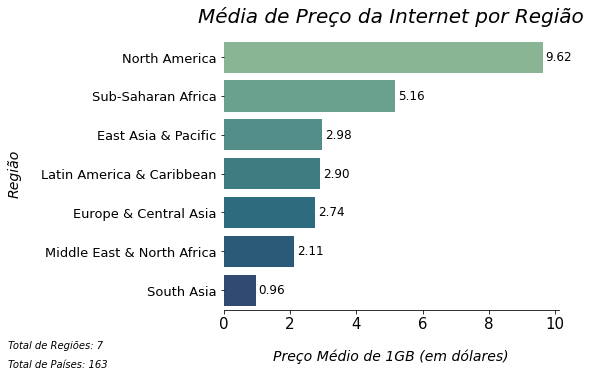

In [26]:
fig, ax = plt.subplots(figsize = (6,5))
sns.barplot(x = '1GB_preco_medio', y = 'regiao', data = gb_regiao.sort_values(by = '1GB_preco_medio', ascending = False), palette = 'crest')
ax.set_title('Média de Preço da Internet por Região', fontsize = "20", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Preço Médio de 1GB (em dólares)', fontsize = 14, style = "italic", labelpad = 18)
ax.set_ylabel('Região', fontsize = "14", style = "italic", labelpad = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
for container in ax.containers:
    ax.bar_label(container,size=12,fmt='%.2f', padding = 3)
sns.despine(left=True)

plt.text(-6.5, 7.5,'Total de Regiões: 7', fontsize=10, style = 'italic')
plt.text(-6.5, 8,'Total de Países: 163', fontsize=10, style = 'italic')

##### 1 GB por País
- barra

Text(-1, 23, 'Total de Países: 21')

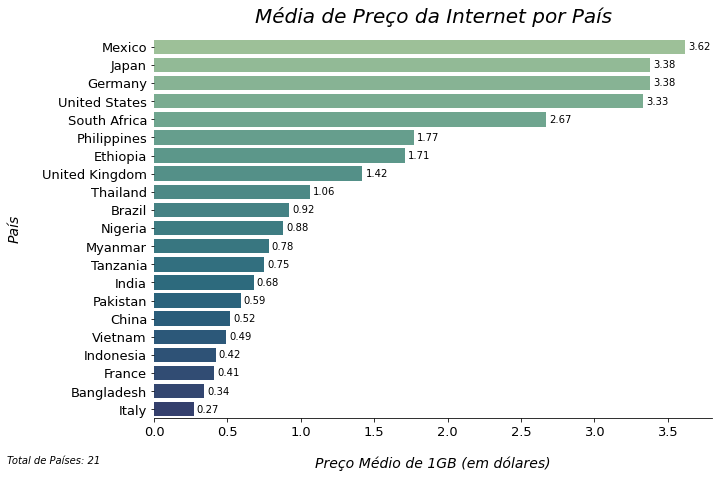

In [27]:
fig, ax = plt.subplots(figsize = (10,7))
oi = sns.barplot(x = '1GB_preco_medio', y = 'pais', data = paises_analisar.sort_values(by = '1GB_preco_medio', ascending = False), palette = 'crest')
ax.set_title('Média de Preço da Internet por País',  fontsize = "20", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Preço Médio de 1GB (em dólares)', fontsize = "14", style = 'italic', labelpad = 18)
ax.set_ylabel('País', fontsize = "14", style = "italic", labelpad = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
for container in ax.containers:
    ax.bar_label(container,size=10,fmt='%.2f', label_type = 'edge', padding = 3)
sns.despine(left=True)

plt.text(-1, 23,'Total de Países: 21', fontsize=10, style = 'italic')

##### 1GB por Usuários de Internet(%) (países escolhidos)
- dispersão

Text(-0.5, -10, 'Total de Países: 21')

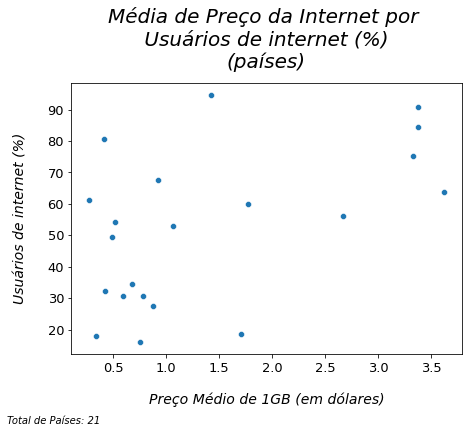

In [28]:
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = '1GB_preco_medio', y='usuarios_internet_%', data = paises_analisar)
ax.set_title('Média de Preço da Internet por \n Usuários de internet (%) \n(países)', fontsize = "20", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Preço Médio de 1GB (em dólares)', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('Usuários de internet (%)', fontsize = "14", style = "italic", labelpad = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns.despine(left = False, top = False, right = False)

plt.text(-0.5, -10,'Total de Países: 21', fontsize=10, style = 'italic')

##### 1GB por Usuários de Internet(%) (regiões)
- dispersão

In [29]:
preco = data[['1GB_preco_medio','usuarios_internet_%' ,'regiao']].groupby('regiao').mean().reset_index()
preco

,regiao,1GB_preco_medio,usuarios_internet_%
0,East Asia & Pacific,2.977600,51.492308
1,Europe & Central Asia,2.743261,77.187174
2,Latin America & Caribbean,2.898846,54.900000
3,Middle East & North Africa,2.112353,71.970588
4,North America,9.616667,88.766667
5,South Asia,0.961250,32.676250
6,Sub-Saharan Africa,5.155714,22.202432


Text(-0.8, 5, 'Total de Países: 163')

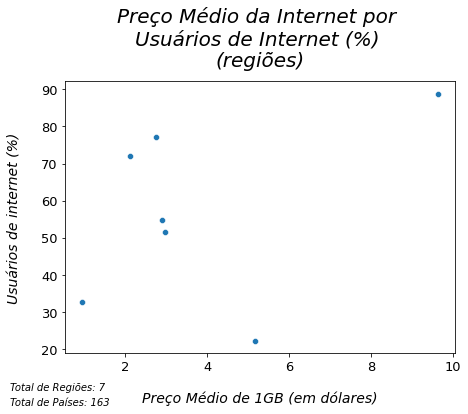

In [30]:
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(x = '1GB_preco_medio', y='usuarios_internet_%', data = preco)
ax.set_title('Preço Médio da Internet por \nUsuários de Internet (%) \n(regiões)', fontsize = "20", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('Preço Médio de 1GB (em dólares)', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('Usuários de internet (%)', fontsize = "14", style = "italic", labelpad = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns.despine(left = False, top = False, right = False)

plt.text(-0.8, 9,'Total de Regiões: 7', fontsize=10, style = 'italic')
plt.text(-0.8, 5,'Total de Países: 163', fontsize=10, style = 'italic')

##### País por Grupo de Renda (países escolhidos)
- barra

In [31]:
pais_renda = paises_analisar[['pais', 'grupo_renda']].groupby('grupo_renda').count().reset_index()
pais_renda

,grupo_renda,pais
0,High income,6
1,Low income,1
2,Lower middle income,9
3,Upper middle income,5


Text(-6.2, 4.5, 'Total de Países: 21')

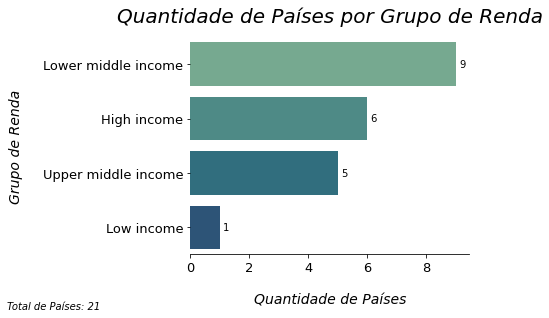

In [32]:
#criando uma figura
fig, ax = plt.subplots(figsize = (5,4))
#criando o gráfico
sns.barplot(x = 'pais', y = 'grupo_renda', data = pais_renda.sort_values(by = 'pais', ascending = False), palette = 'crest')
#colocando um título
ax.set_title('Quantidade de Países por Grupo de Renda', fontsize = "20", style = "italic", loc = "center", pad = 15)
#mudando o nome do eixo x e y
ax.set_xlabel('Quantidade de Países', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('Grupo de Renda', fontsize = "14", style = "italic", labelpad = 20)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

for container in ax.containers:
    ax.bar_label(container,size=10,fmt='%.0f', label_type = 'edge', padding = 3)

#tirando o contorno do gráfico
sns.despine(left=True)

plt.text(-6.2, 4.5,'Total de Países: 21', fontsize=10, style = 'italic')

##### País por População ***
- barra

Text(-400000000, 23, 'Total de Países: 21')

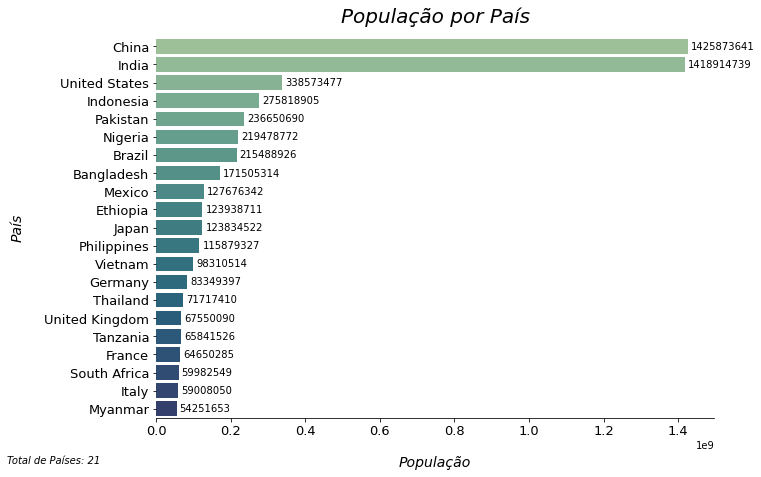

In [33]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot( x = 'populacao', y = 'pais', data = paises_analisar.sort_values(by = 'populacao', ascending = False), palette = 'crest')
ax.set_title('População por País', fontsize = "20", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('População', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('País', fontsize = "14", style = "italic", labelpad = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
for container in ax.containers:
    ax.bar_label(container,size=10, fmt='%.0f', label_type = 'edge', padding = 3)
sns.despine(left=True)

plt.text(-400000000, 23,'Total de Países: 21', fontsize=10, style = 'italic')

##### População por Região
- barra

In [34]:
populacao_regiao = data[['populacao', 'regiao']].groupby('regiao').mean().sort_values(by='populacao', ascending = False).reset_index()
populacao_regiao

,regiao,populacao
0,South Asia,2.402697e+08
1,North America,1.257169e+08
2,East Asia & Pacific,8.733683e+07
3,Sub-Saharan Africa,2.856232e+07
4,Latin America & Caribbean,2.362012e+07
5,Europe & Central Asia,1.403685e+07
6,Middle East & North Africa,1.402255e+07


Text(-160000000, 8, 'Total de Países: 163')

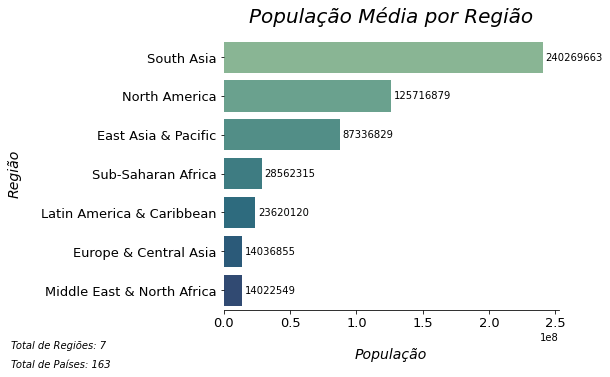

In [35]:
fig, ax = plt.subplots(figsize = (6,5))
sns.barplot( x = 'populacao', y = 'regiao', data = populacao_regiao.sort_values(by = 'populacao', ascending = False), palette = 'crest')
ax.set_title('População Média por Região', fontsize = "20", style = "italic", loc = "center", pad = 15)
ax.set_xlabel('População', fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel('Região', fontsize = "14", style = "italic", labelpad = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
for container in ax.containers:
    ax.bar_label(container,size=10,fmt='%.0f', label_type = 'edge', padding = 3)
sns.despine(left=True)

plt.text(-160000000, 7.5,'Total de Regiões: 7', fontsize=10, style = 'italic')
plt.text(-160000000, 8,'Total de Países: 163', fontsize=10, style = 'italic')

##### PIB por Usuários de Internet (todos os países)
- dispersão

Text(-25000, -23, 'Total de Países: 163')

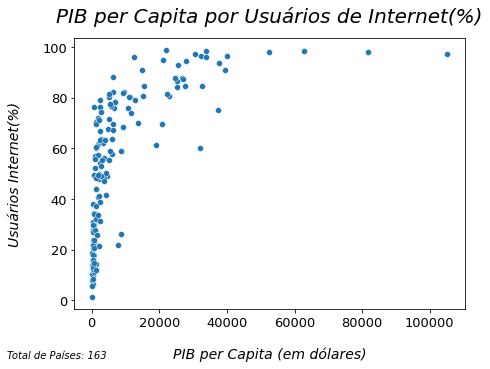

In [36]:
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot( x = "PIB_per_capita", y = "usuarios_internet_%", data = data)
ax.set_title("PIB per Capita por Usuários de Internet(%)", fontsize= "20", style=  "italic", loc= "center", pad = 15)
ax.set_xlabel("PIB per Capita (em dólares)", fontsize = "14", style = "italic", labelpad = 18)
ax.set_ylabel("Usuários Internet(%)", fontsize = "14", style = "italic", labelpad = 20)

plt.xticks(fontsize = 13)
plt.yticks(fontsize= 13)

sns.despine(left= False, top = False, right= False)

plt.text(-25000, -23,'Total de Países: 163', fontsize=10, style = 'italic')

##### PIB por Região
- barra

Text(-21500, 6.8, 'Total de Países: 21')

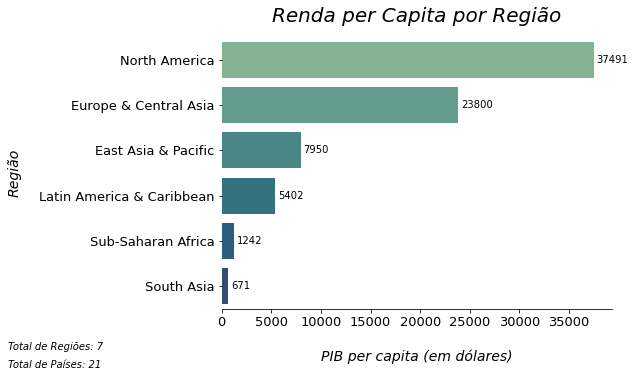

In [37]:
fig, ax = plt.subplots(figsize=(7,5))

pib_regiao = paises_analisar[['PIB_per_capita', 'regiao']].groupby('regiao').mean().reset_index()
pib_regiao.sort_values('PIB_per_capita', ascending=False, inplace=True)

plot = sns.barplot(data=pib_regiao, y='regiao', x='PIB_per_capita', palette = 'crest')
plot.set_title('Renda per Capita por Região', fontsize = "20", style = "italic", loc = "center", pad = 15)
plot.set_ylabel('Região', fontsize = "14", style = "italic", labelpad = 18)
plot.set_xlabel('PIB per capita (em dólares)', fontsize = "14", style = "italic", labelpad = 20)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

for container in ax.containers:
    ax.bar_label(container, size=10, fmt='%.0f', padding=3)
sns.despine(left = True)

plt.text(-21500, 6.4,'Total de Regiões: 7', fontsize=10, style = 'italic')
plt.text(-21500, 6.8,'Total de Países: 21', fontsize=10, style = 'italic')